### Importing Relevant Packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

### Loading and Transforming the Data

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')



### Removing Surplus Data

In [3]:
df_comp['market_value']=df_comp.spx

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### White Noise

In [5]:
white_noise = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [6]:
df['white_noise'] = white_noise

C:\Windows\Temp\ipykernel_17052\534777122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['white_noise'] = white_noise


In [7]:
df.describe()

,market_value,white_noise
count,5021.000000,5021.000000
mean,1091.651926,1090.731215
std,292.559287,285.181441
min,438.920000,199.858154
25%,914.620000,891.288619
50%,1144.650000,1093.988220
75%,1316.280729,1284.931179
max,1570.252238,2035.020627


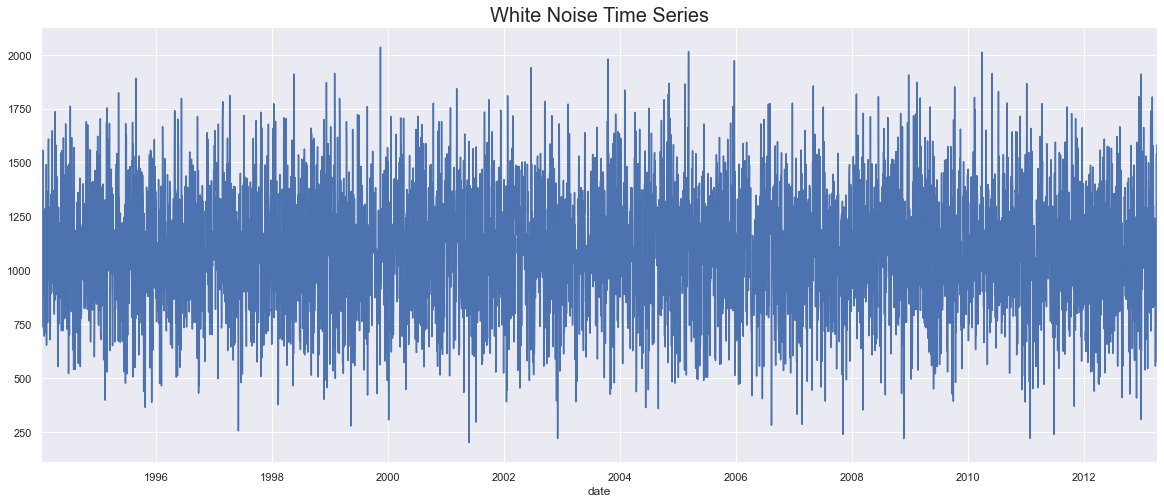

In [8]:
plt.figure(figsize = (20,8))
df.white_noise.plot()
plt.title("White Noise Time Series", size=20)
plt.show()

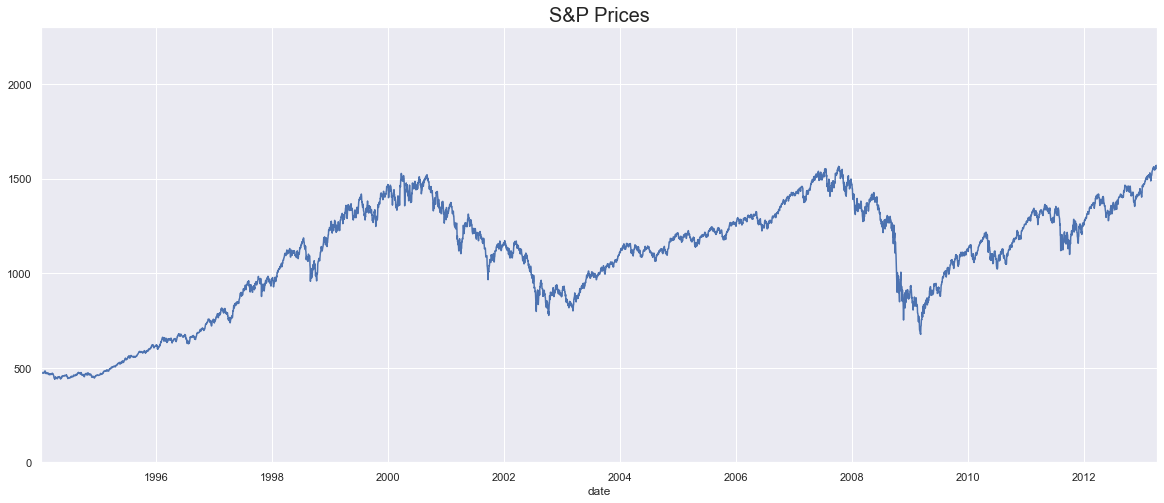

In [9]:
plt.figure(figsize = (20,8))
df.market_value.plot()
plt.ylim(0,2300)
plt.title("S&P Prices", size=20)
plt.show()

#### Smaller jumps between periods for S&P values

### Random Walk

In [10]:
rwalk = pd.read_csv('RandWalk.csv')
rwalk.date = pd.to_datetime(rwalk.date, dayfirst = True)
rwalk.set_index("date", inplace = True)
rwalk = rwalk.asfreq('b')

In [11]:
rwalk.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [12]:
df['rwalk'] = rwalk.price

C:\Windows\Temp\ipykernel_17052\1419569121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rwalk'] = rwalk.price


In [13]:
rwalk.head()

,price
date,
1994-01-07,1122.139662
1994-01-10,1080.347860
1994-01-11,1082.095245
1994-01-12,1083.639265
1994-01-13,1067.146255


In [14]:
df.head()

,market_value,white_noise,rwalk
date,,,
1994-01-07,469.90,887.642133,1122.139662
1994-01-10,475.27,1115.574061,1080.347860
1994-01-11,474.13,1561.156297,1082.095245
1994-01-12,474.17,735.868811,1083.639265
1994-01-13,472.47,1055.245047,1067.146255


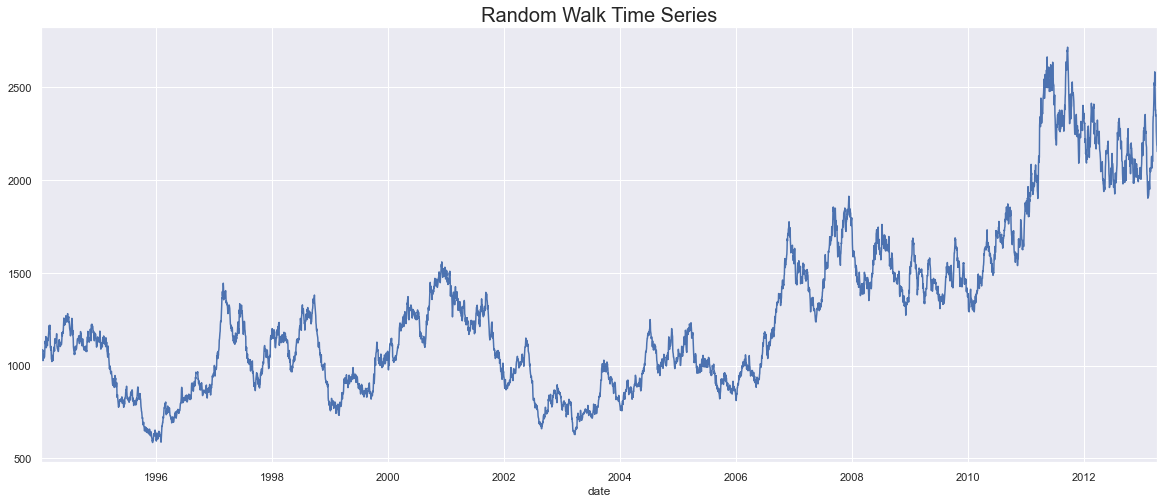

In [15]:
plt.figure(figsize = (20,8))
df.rwalk.plot()
plt.title("Random Walk Time Series", size=20)
plt.show()

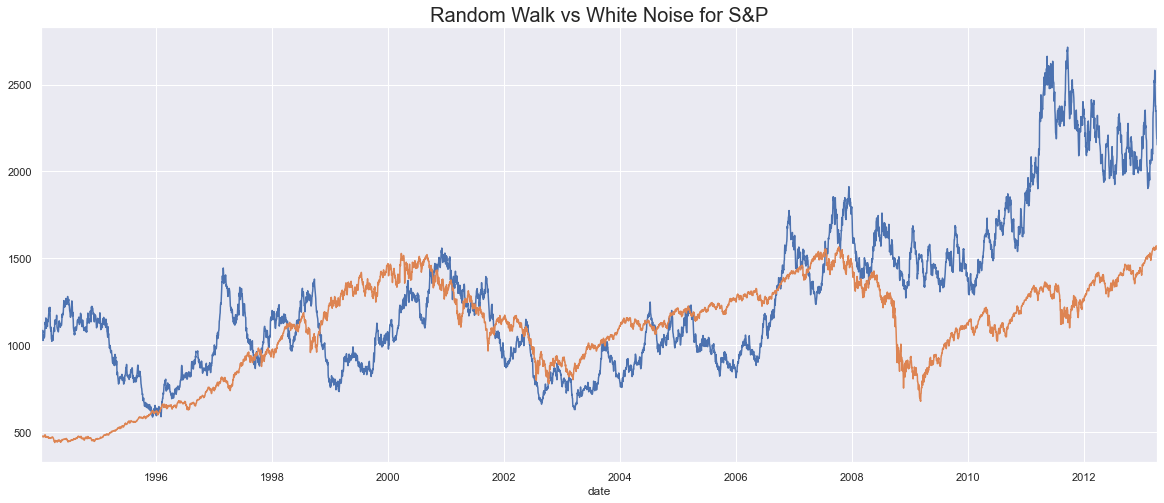

In [17]:
plt.figure(figsize = (20,8))
df.rwalk.plot()
df.market_value.plot()
plt.title("Random Walk vs White Noise for S&P", size=20)
plt.show()

#### Observation:
##### Small Variances between consecutive time-periods
##### Cyclical increases & decreases in short periods of time

### Stationarity

### Seasonality

### ACF

### PACF